In [34]:
### Import the necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

### Load the CSV files into the notebook
ca_data  = pd.read_csv("Datasets\\seattle\\calendar.csv")
li_data = pd.read_csv("Datasets\\seattle\\listings.csv")
re_data = pd.read_csv("Datasets\\seattle\\reviews.csv")


<b> Finding an apartment in another city or even country can be an headache if the offer is huge.<br>
    To get a better overview of offered apartments and their prices it would be interesting to extract all the main factors to be able to build a model which can give us an overview.<br>
    How does the apartment size affect it? Would it be smart to make decisions based on time of year?</b><br>
    <b> The Dataset i have chosen is the Seattle dataset provided at [Kaggle](https://www.kaggle.com/airbnb/seattle)



## Approach

To analyze the data structured i decided to use the CRISP-DM process.

1. Business Understanding
    - What's the goal?
    - How can we achieve it
    <br><br>
2. Data Understanding
    - What kind of Data do we have? numerical, text, categorial?
    - Do we have a lot of missing Data?
    - Which are the main factors corresponding to our business Goal
    <br><br>
    
3. Data Preprocessing
    - Remove data which is not necessary
    - If data is missing, how to we fill them with meaningful information? Median? Nearest Neighbor?
    - Find Correlations for price prediction
    <br><br>
    
4. Modeling
    - Which Model can be used to get good results for our problematic?
    - What Metric is useful to calculate the error?
    <br><br>

5. Evaluation
    - Does the model predict information which make sense or to we have to get another approach?
    

## Business Understanding

The first thing we need to do is understand the goal we want to achieve.<br>
Since we want to get a price prediciton it is useful to get an overview what are the key factors corresponding to the rent.<br>
Accoring to the [official AirBnB](https://www.airbnb.com/help/article/125/how-is-the-price-determined-for-my-reservation?locale=en) website the price is determined by<br>
  * AirBnB service fee
  - Cleaning Fee
  - Extra guest fee
  - Value Added taxes
  - Local taxes
  - Security deposit
<br> <br>
<b> And the actual nightly rate which is set by the host</b><br>

Our key goal is to get a price prediction based on the nightly rate.


## Understanding the Data

### First Thing i want to do is get an overview of the different Datasets 

 Is the Data Complete or do we have a lot of missing data?<br>
 What kind of data do we have?<br>
 
 What are the different datasets we are using?
   - review - A Dataset containing all the reviews which have been made
   - calendar - Inclusing the listing id, the price and availabillity for the mentioned day
   - listing - A full description with the name of the house, location, amenities etc.

##### Firstly review data

In [35]:
re_data.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
5,7202016,43979139,2015-08-23,1154501,Barent,"Kelly was great, place was great, just what I ..."
6,7202016,45265631,2015-09-01,37853266,Kevin,Kelly was great! Very nice and the neighborhoo...
7,7202016,46749120,2015-09-13,24445447,Rick,hola all bnb erz - Just left Seattle where I h...
8,7202016,47783346,2015-09-21,249583,Todd,Kelly's place is conveniently located on a qui...
9,7202016,48388999,2015-09-26,38110731,Tatiana,"The place was really nice, clean, and the most..."


In [36]:
re_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [37]:
## Check the Proportion of the missing values
re_data.isnull().sum()/re_data.shape[0]

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.000212
dtype: float64

#### After getting a small overview about the review data, it can be said that the reviews won't be helpful for a meaningful price prediction <br>
####    --> No further analysis is necessary for our goal!

##### Secondly Calender dates

In [38]:
ca_data.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [39]:
ca_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [40]:
ca_data.isnull().sum()/ca_data.shape[0]

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

#### With calender.csv we are able to see a trend. Does the price depend on the month?
A problem we got here is that the price column got about 33% of missing values which have to be filled up. This is because the Apartment isn't available on these days. But since we want to get a price prediction for every day is is necessary to fill those dates as well.

##### Thirdly  listings data

In [41]:
li_data.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55


In [42]:
li_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

To get an overview of the missing values in our listing dataset, we are going to plot them as barplot

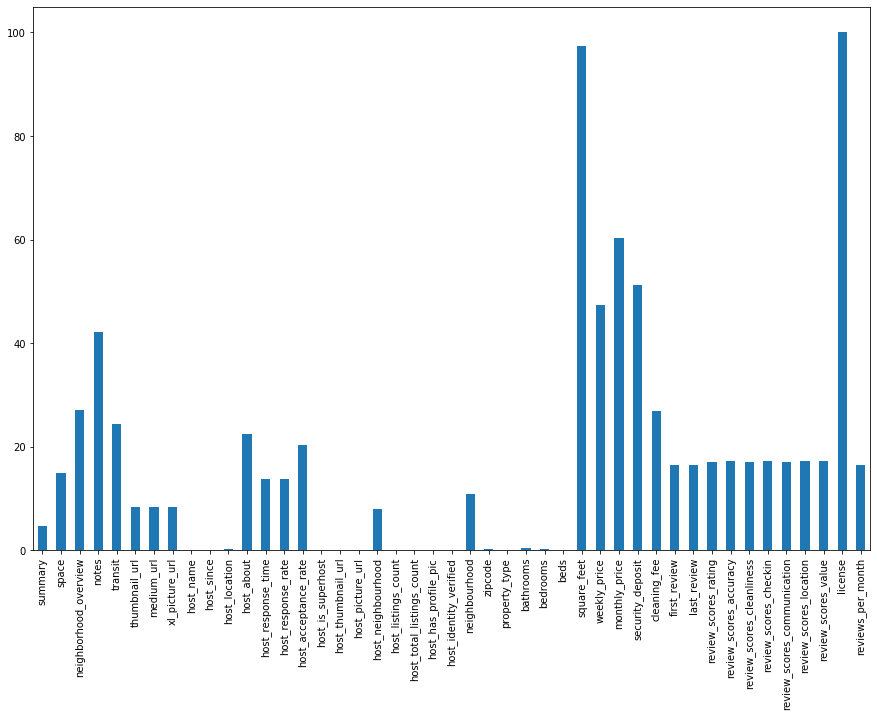

In [43]:
li_data_is_null = li_data.isnull().mean()*100  ###

### Get only the features with NaN values 
li_nan_data = li_data_is_null[li_data_is_null > 0]


fig = plt.figure(figsize = (15,10))
li_nan_data.plot(kind = "bar")

##### Now after checking out the data we need to decide what are the key factors to predict reservation prices

Looking at the Data there are some features which seem to be interesting for the price prediction:
  - Amenities like TV, WIFI, Washer etc...
  - The actual Neighborhood, since it is interesting it what part of Seattle the Aparment is
  

First thing we want to do is get some helper functions to clean our data.

In [44]:

''' Since we cant work with strings it is useful to split the date into month and the year'''
def get_month(row):
    '''The function takes in a row, splits the string and gives out the month as integer'''
    month = row["date"].split("-")[1]
    return int(month)

def get_year(row):
    '''The function takes in a row, splits the string and gives out the year as integer'''
    year = row["date"].split("-")[0]
    return int(year)

def convert_str_to_float(df,name):
    '''Convert String to Integers, for example the Price'''
    try:
        df[name] = df[name].str.replace("$","")
        df[name] = df[name].str.replace(",","").astype(float)
        return df
    except:
        return df


def split_list(row):
    '''Get the different amenities split into a series'''
    amen = row.replace("{","").replace('"','').replace("}","")
    amen = amen.split(",")
   # amen = amen.replace("{","").replace('"','').replace("}","")
    return amen



def unique_amen(series): 
    '''Since there are many amenities in the different Apartments we want to create seperated columns
    of those unique values to create our dummy  columns with 1's and 0's '''
    
    unique_values = []
    for i in range(len(series)):
        for amen in series[i]:
            if str(amen) not in unique_values:
                unique_values.append(str(amen))
                
    return unique_values

In [47]:
##Trying the functions
ca_data['month'] = ca_data.apply(lambda row: get_month(row),axis = 1)
ca_data['year'] = ca_data.apply(lambda row: get_year(row),axis = 1)

In [48]:
ca_data.tail()

,listing_id,date,available,price,month,year
1393565,10208623,2016-12-29,f,NaN,12,2016
1393566,10208623,2016-12-30,f,NaN,12,2016
1393567,10208623,2016-12-31,f,NaN,12,2016
1393568,10208623,2017-01-01,f,NaN,1,2017
1393569,10208623,2017-01-02,f,NaN,1,2017


In [50]:
ca_data.groupby(['year','listing_id']).count()

date  available  price  month
year listing_id                               
2016 3335         363        363    307    363
     4291         363        363    363    363
     5682         363        363    308    363
     6606         363        363    363    363
     7369         363        363     53    363
...               ...        ...    ...    ...
2017 10332096       2          2      2      2
     10334184       2          2      2      2
     10339144       2          2      0      2
     10339145       2          2      2      2
     10340165       2          2      2      2

[7636 rows x 4 columns]

In [51]:
##Testing the conversion from string to float since the price is given as string
ca_data = convert_str_to_float(ca_data,'price')

In [52]:
type(ca_data['price'][0])

numpy.float64

In [45]:
## Apply the function to split the string into lists with each amenitie
amen = li_data['amenities'].apply(lambda row: split_list(row))
type(amen)

pandas.core.series.Series

In [76]:
## Create the Dummy columns to list every amenitie as boolean
s = pd.Series(amen)
dummies = pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)
dummies

,,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,0,0,0,0,1,0,1,0,0,0,...,1,0,1,0,0,1,1,0,0,1
2,0,0,1,0,0,1,1,1,1,0,...,0,1,1,0,0,1,1,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,1,1,1,0,0,0,1,0,0,1
4,0,0,0,0,0,1,1,0,0,0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,0,0,1,0,0,1,0,0,0,0,...,0,1,1,0,0,1,1,0,1,1
3814,0,1,0,0,0,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
3815,0,0,0,1,0,1,0,1,1,0,...,1,0,1,0,0,0,1,0,0,1
3816,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


Now we got the Dummy columns which have to be concatenated to our dataframe we want to use to train our model!